In [ ]:
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(dataset_url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

# выведем первые пять строк
print("\nhead")
print(dataset.head())

# выведем последние пять строк
print("\ntail")
print(dataset.tail())

# выведем информацию о всех столбцах
print("\ninfo")
print(dataset.info())

# выведем описательную статистику для всех числовых столбцов
print("\ndescribe")
print(dataset.describe())




head
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

tail
     sepal_length  sepal_width  petal_length  petal_width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        N

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
import pandas as pd
from sklearn.datasets import load_iris

# загрузка датасета
iris = load_iris()

# создание переменной dataset с именами колонок в качестве названий параметров
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

# задаем данные для столбчатой диаграммы
x_axis_labels = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_axis_values = dataset.describe().loc['mean', :'petal width (cm)'].tolist()

# устанавливаем цвета столбцов в зависимости от значения показателя
colors = ['red' if val < 3 else 'green' for val in y_axis_values]

# создаем объект для столбчатой диаграммы
fig = go.Figure(data=[go.Bar(
    x=x_axis_labels,  # по оси X указываем названия параметров
    y=y_axis_values,  # по оси Y указываем значения параметров
    marker=dict(color=y_axis_values, coloraxis="coloraxis"),  # устанавливаем цвета столбцов
    text=y_axis_values,
    textposition='auto',
    # урамляем дополнительные параметры для улучшения внешнего вида графика
    width=0.7,
    marker_line_width=2,
    marker_line_color='black',
)])

# установим заголовок графика
fig.update_layout(title=dict(text="Средние значения параметров", y=0.95, x=0.5, xanchor='center', yanchor='top', font=dict(size=20)))

# установим подписи для осей X и Y
fig.update_layout(xaxis=dict(title=dict(text="Параметры", font=dict(size=16)), tickangle=-45, tickfont=dict(size=14)),
                  yaxis=dict(title=dict(text="Средние значения", font=dict(size=16)), tickfont=dict(size=14)))

# установим высоту графика
fig.update_layout(height=700)

# установим сетку
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')

# уберем лишние отступы по краям
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))

fig.show()



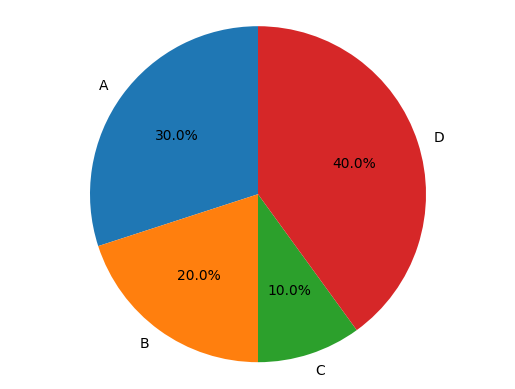

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your data for the chart
x_axis_labels = ['A', 'B', 'C', 'D']
y_axis_values = [30, 20, 10, 40]

# Create a DataFrame with data for a pie chart
pie_df = pd.DataFrame({'Параметры': x_axis_labels, 'Значения': y_axis_values})

# Group values in column 'Значения' based on condition '>=3' and 'меньше 3', create column 'Группы'
pie_df['Группы'] = pie_df['Значения'].apply(lambda x: '>=3' if x >= 3 else 'меньше 3')

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(pie_df['Значения'], labels=pie_df['Параметры'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Display the chart
plt.show()



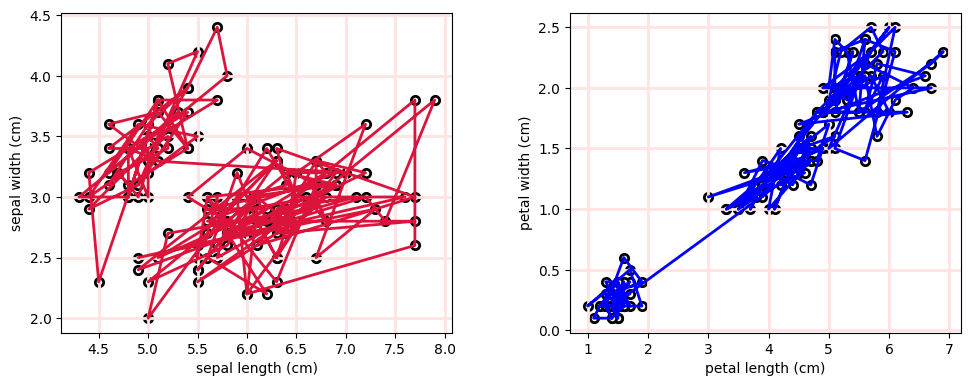

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Загружаем набор данных ирисов
iris = datasets.load_iris()

# Конвертируем его в DataFrame
dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset["species"] = iris.target_names[iris.target]

# разделим датафрейм на две группы для построения линейных графиков
group1 = dataset[['sepal length (cm)', 'sepal width (cm)']]
group2 = dataset[['petal length (cm)', 'petal width (cm)']]

# создаем список названий параметров
names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# создаем словарь цветов для линий и точек
colors = {'crimson': names[:2], 'blue': names[2:]}

# строим графики
fig, axs = plt.subplots(ncols=2, figsize=(10,4))

# рисуем график для первой группы
axs[0].plot(group1[names[0]], group1[names[1]], color='crimson', linewidth=2)
axs[0].scatter(group1[names[0]], group1[names[1]], color='white', edgecolors='black', linewidths=2)
axs[0].set_xlabel(names[0])
axs[0].set_ylabel(names[1])

# рисуем график для второй группы
axs[1].plot(group2[names[2]], group2[names[3]], color='blue', linewidth=2)
axs[1].scatter(group2[names[2]], group2[names[3]], color='white', edgecolors='black', linewidths=2)
axs[1].set_xlabel(names[2])
axs[1].set_ylabel(names[3])

# устанавливаем сетку
axs[0].grid(linewidth=2, color='mistyrose')
axs[1].grid(linewidth=2, color='mistyrose')

# уберем лишние отступы по краям
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.9, wspace=0.3, hspace=0.2)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-2-31c9e045aafc>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[row][col].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap=plt.cm.get_cmap('jet', 10))
<ipython-input-2-31c9e045aafc>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[n

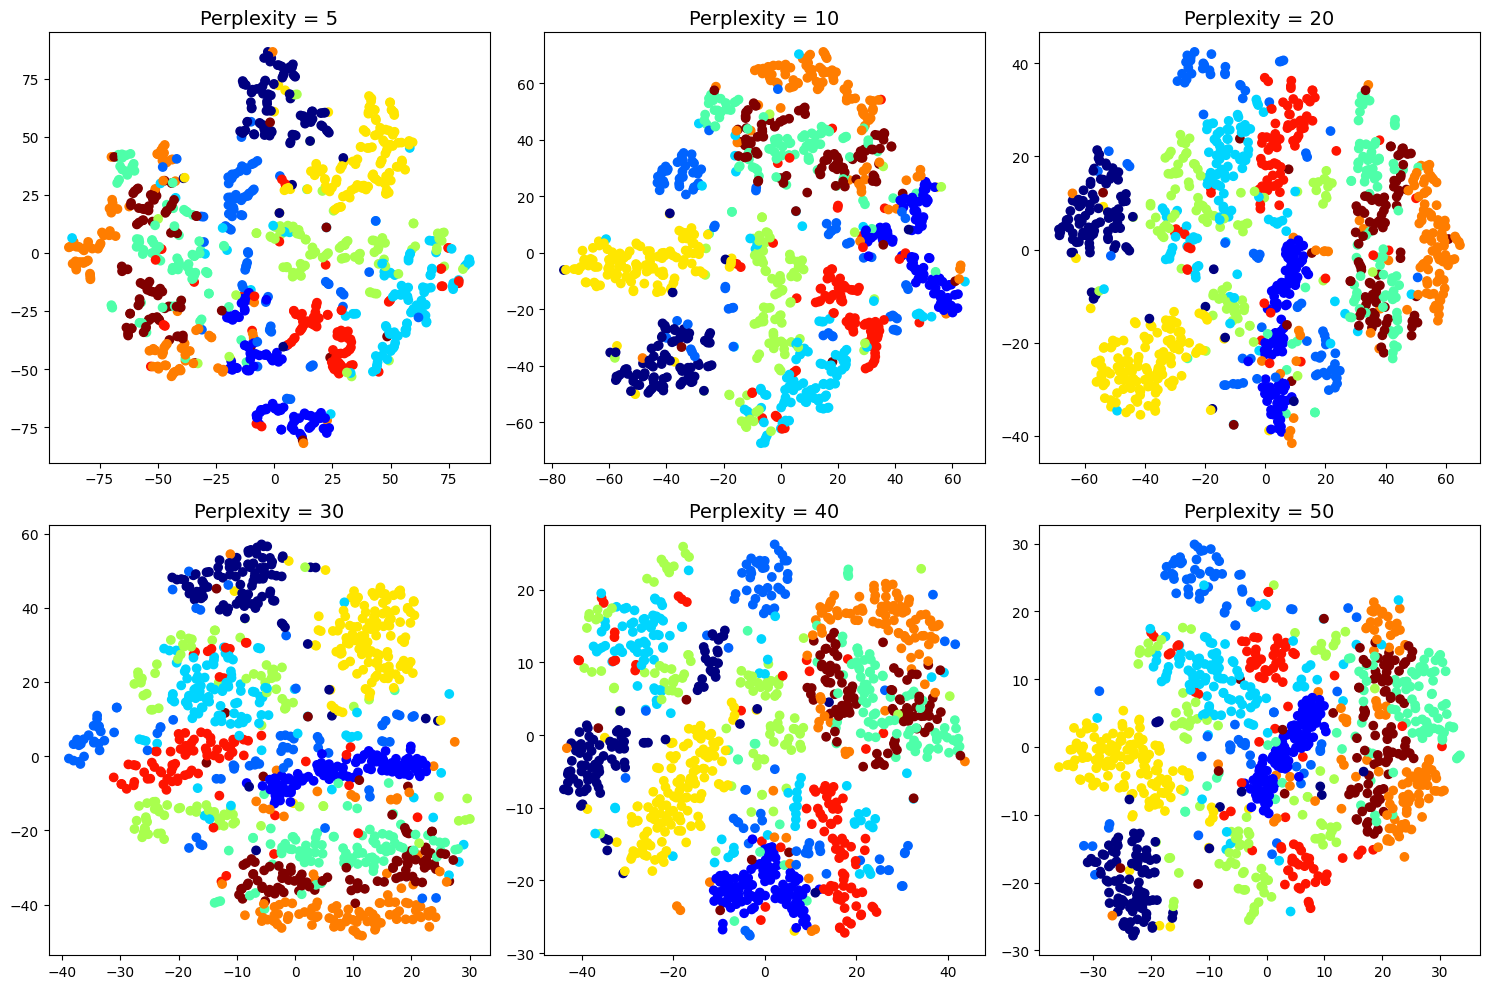

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# загружаем набор данных MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# подготовим данные
X = mnist.data / 255.0
y = mnist.target.astype('int')

# выберем случайную подвыборку из 1000 изображений
indices = np.random.choice(X.shape[0], 1000, replace=False)
X_sample = np.take(X, indices, axis=0)
y_sample = np.take(y, indices)

from sklearn.manifold import TSNE

# задаем значения перплексии
perplexities = [5, 10, 20, 30, 40, 50]

# задаем размер графиков
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# проходим в цикле по значениям перплексии и строим графики
for i, perplexity in enumerate(perplexities):
    row = i // 3
    col = i % 3

    # применяем алгоритм t-SNE и строим график
    tsne = TSNE(n_components=2, learning_rate=200.0, perplexity=perplexity, early_exaggeration=12.0, random_state=42)
    # где n_components - размерность пространства(в данном случае используется 2х мерное) learning_rate - скорость обучения алгоритма и сила скукоживания точек
    # perplexity - равномерность распределения объектов early_exaggeration - начальное расстояние между объектами random_state - параметр установки начального состояния генератора псевдослучайных чисел
    # (чтобы генерировать одинаковую последовательность случайных чисел)
    X_tsne = tsne.fit_transform(X_sample)
    axs[row][col].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap=plt.cm.get_cmap('jet', 10))
    axs[row][col].set_title("Perplexity = {}".format(perplexity), fontsize=14)

plt.tight_layout()
plt.show()




In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=ba624f29fc52471b142e7ad638e0c9343bbb74ec5c850e9dffc7718182bc712f
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=17fd020e740ae02a0fd3e6c4591677b26a0618d871f96403dc6b6c9769610d1a
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


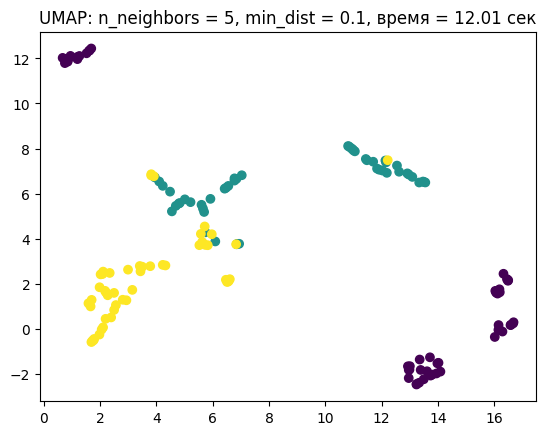

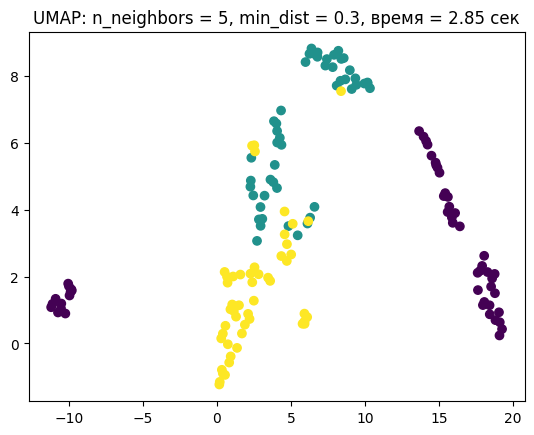

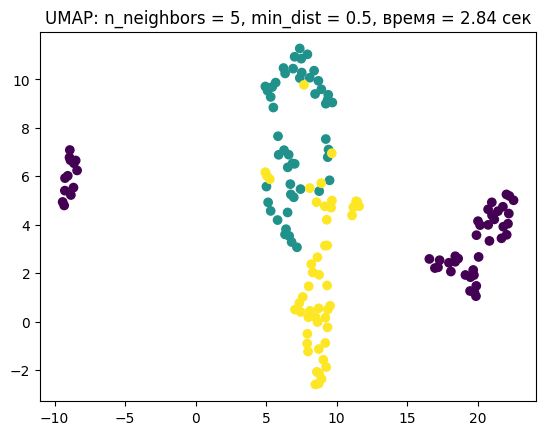

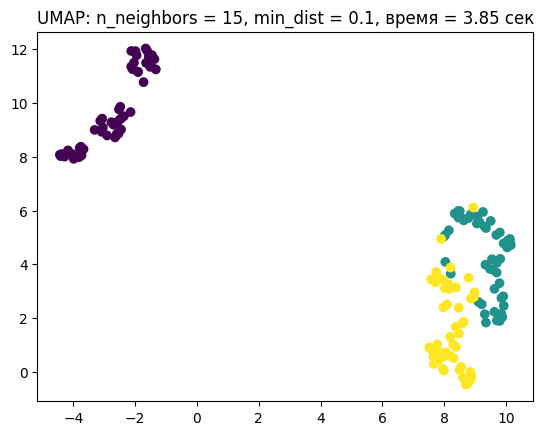

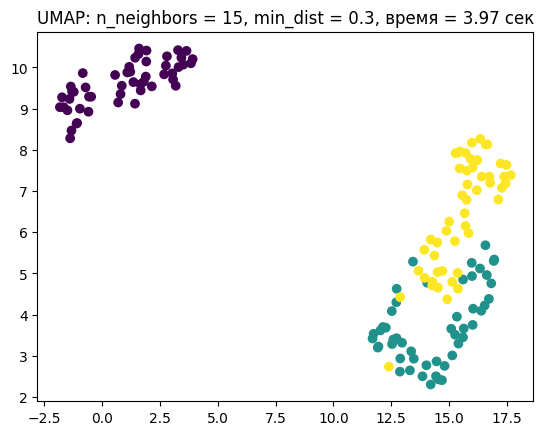

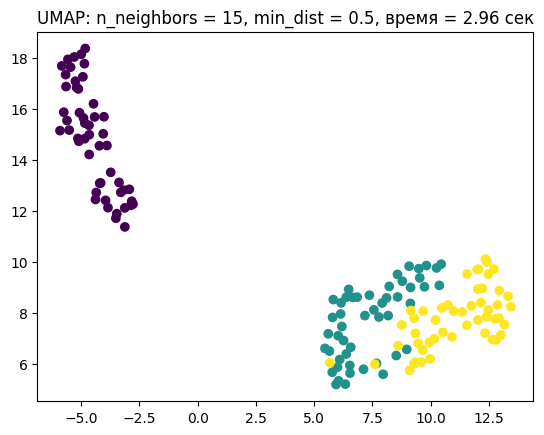

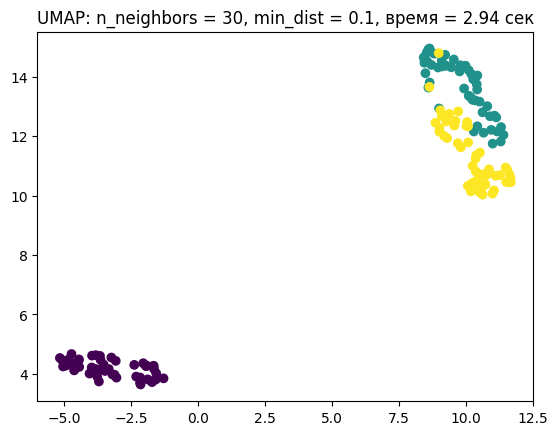

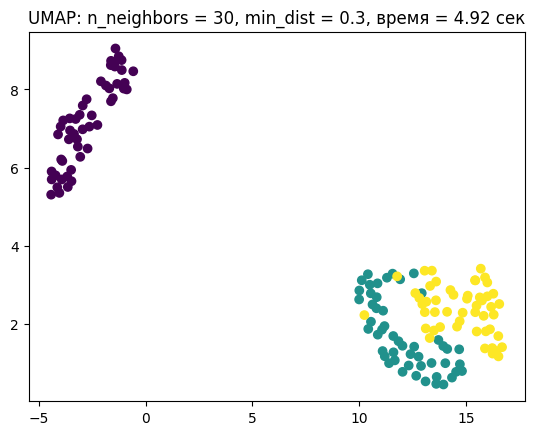

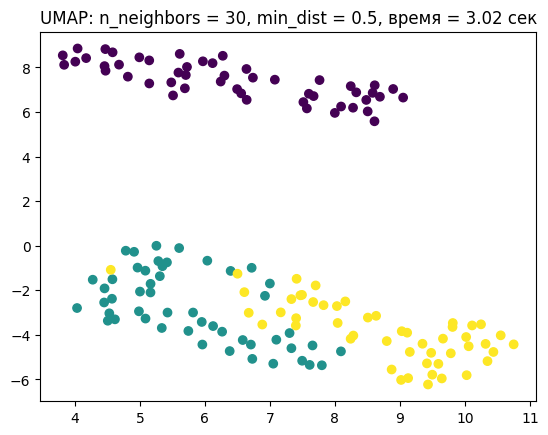

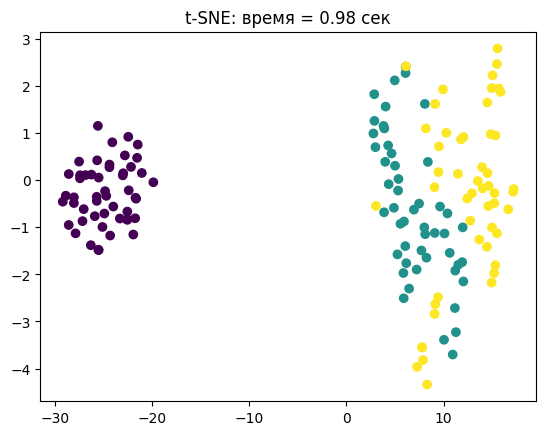

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import time

# Загрузка и обработка данных
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(dataset_url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
data_scaled = StandardScaler().fit_transform(data.iloc[:, :-1])  # стандартизация данных

# Обучение и визуализация UMAP
neighbors = [5, 15, 30]
min_dists = [0.1, 0.3, 0.5]

for n_neighbors in neighbors:
    for min_dist in min_dists:
        start = time.time()
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
        embedding = reducer.fit_transform(data_scaled)
        end = time.time()

        plt.scatter(embedding[:, 0], embedding[:, 1], c=pd.factorize(data['class'])[0], cmap='viridis')
        plt.title(f'UMAP: n_neighbors = {n_neighbors}, min_dist = {min_dist}, время = {end - start:.2f} сек')
        plt.show()

# Обучение и визуализация t-SNE
start = time.time()
tsne = TSNE()
tsne_embedding = tsne.fit_transform(data_scaled)
end = time.time()

plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=pd.factorize(data['class'])[0], cmap='viridis')
plt.title(f't-SNE: время = {end - start:.2f} сек')
plt.show()
